In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import shutil

src = "/kaggle/input/teethdata"
dest = "/kaggle/working/teethdata"

shutil.copytree(src, dest)

'/kaggle/working/teethdata'

In [4]:
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/out
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/output
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/outputs
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/output_image.jpg

In [5]:
train_path = "/kaggle/working/teethdata/Teeth_Dataset/Training"
valid_path = "/kaggle/working/teethdata/Teeth_Dataset/Validation"
test_path = "/kaggle/working/teethdata/Teeth_Dataset/Testing"


In [6]:
train_labels = os.listdir(train_path)
valid_labels = os.listdir(valid_path)
test_labels = os.listdir(test_path)

In [7]:
print("Labels in train data", train_labels)
print("Labels in validation data", valid_labels)
print("Labels in test data", test_labels)

Labels in train data ['MC', 'Gum', 'CaS', 'OLP', 'CoS', 'OC', 'OT']
Labels in validation data ['MC', 'Gum', 'CaS', 'OLP', 'CoS', 'OC', 'OT']
Labels in test data ['MC', 'Gum', 'CaS', 'OLP', 'CoS', 'OC', 'OT']


In [7]:
total_train_bytes = sum(os.path.getsize(os.path.join(train_path, label, image)) for label in train_labels for image in os.listdir(os.path.join(train_path, label)))
print('Total Train data size = ', round(total_train_bytes / (1024 * 1024), 2), "Megabytes")

Total Train data size =  26.5 Megabytes


In [6]:
samples_label_train = []
print("# of Samples of each labels : ")
for label in train_labels:
    num_samples = len(os.listdir(os.path.join(train_path, label )))
    print(f"{label} = ", num_samples)
    samples_label_train.append((label,num_samples))

# of Samples of each labels : 
Gum =  360
CoS =  450
CaS =  480
OT =  393
OLP =  540
MC =  540
OC =  324


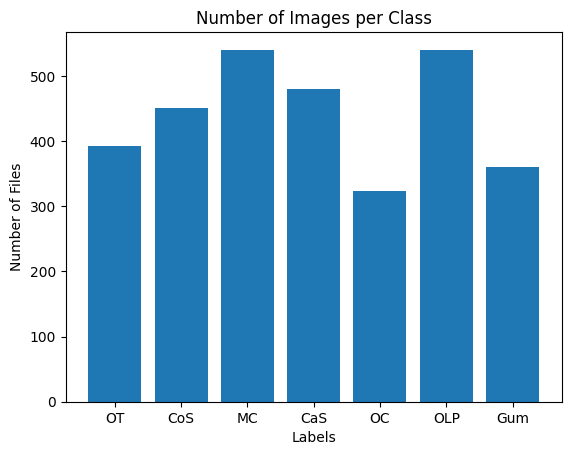

In [6]:
# Compute the number of files for each label
sizes = [len(os.listdir(os.path.join(train_path, label))) for label in train_labels]

# Create the bar chart
plt.bar(train_labels, sizes)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Number of Images per Class')

# Show the plot
plt.show()

In [7]:
#@title **Plot Function**

# Function to plot four random examples from each label
def plot_images(target_directory, num_examples=4, title="Data"):
    fig, axs = plt.subplots(len(labels), num_examples, figsize=(12, 10))
    fig.suptitle(title)

    # Iterate over each label
    for i, label in enumerate(labels):
        label_directory = os.path.join(target_directory, label)
        image_files = os.listdir(label_directory)
        np.random.shuffle(image_files)
        image_files = image_files[:num_examples]

        # Iterate over each image file
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(label_directory, image_file)
            image = plt.imread(image_path)

            # Plot the image
            ax = axs[i, j]
            ax.imshow(image)
            ax.axis('off')

            # Add label as the title
            if j == 0:
                ax.set_title(label)

    fig.tight_layout()
    plt.show()

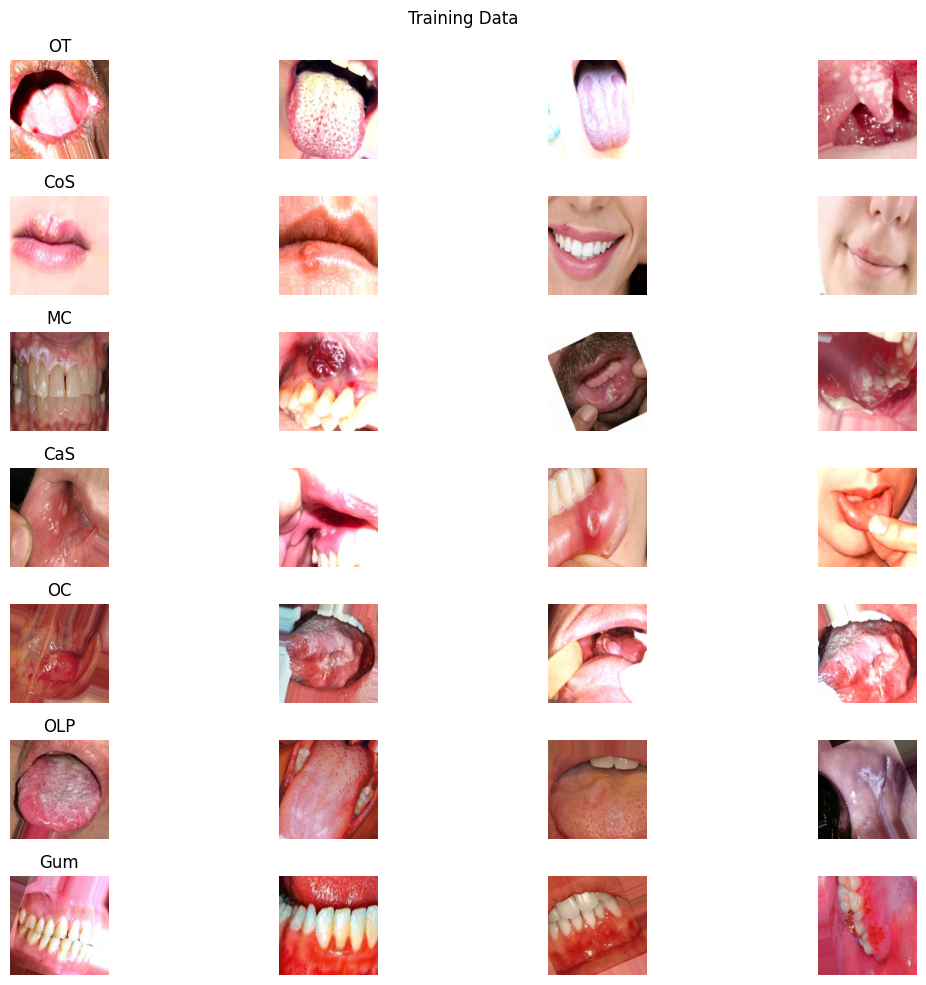

In [12]:
labels = os.listdir(train_path)
plot_images(target_directory=train_path,
            num_examples = 4,
            title="Training Data" )

In [13]:
#@title **Some Shapes of Images**
import matplotlib.image as mpimg
for label in os.listdir(train_path):
    print(f"------------------- {label} -----------------------")
    for ind in range(6):
        image_path = os.path.join(f"{train_path}/{label}", os.listdir(f"{train_path}/{label}")[ind])

        # Load image using matplotlib
        image = mpimg.imread(image_path)

        # Get shape of the image
        shape = image.shape
        print("Shape of the image:", shape)

------------------- OT -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- CoS -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- MC -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- CaS -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

S

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=45,          # Random rotations from 0 to 45 degrees
    zoom_range=0.2,             # Random zoom within 20%
    horizontal_flip=True,       # Randomly flip images horizontally
    shear_range=0.2,            # Random shear transformations
    rescale=1/255,              # Rescale pixel values to [0, 1]
)

2024-08-30 10:37:17.071770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 10:37:17.071891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 10:37:17.218784: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
train_aug = dataGen.flow_from_directory(
    train_path,
    batch_size=32,
    target_size=(256, 256),
    class_mode="categorical",
    shuffle=False  # Set to False to maintain order for combining
)

Found 3087 images belonging to 7 classes.


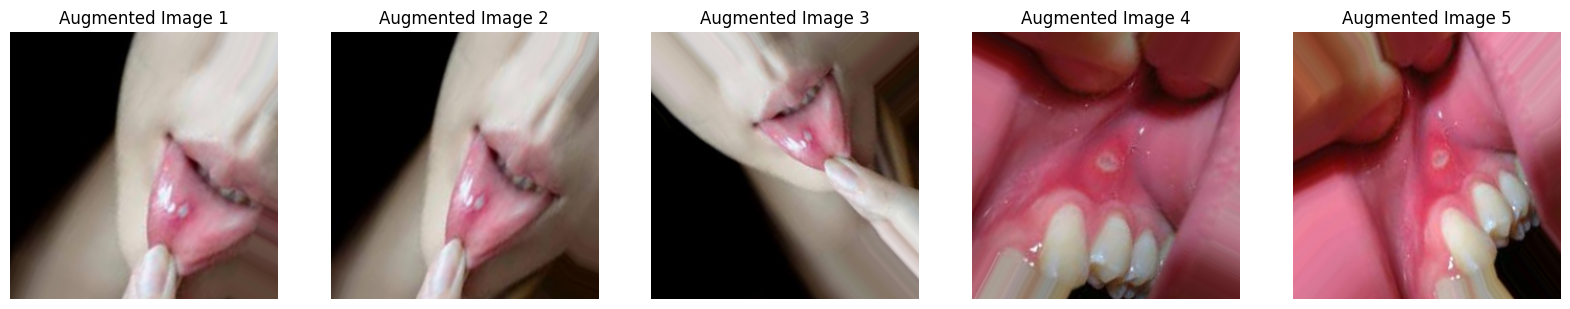

In [9]:
# Plot the first 5 images from the batch
aug_img, aug_label = next(train_aug)
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(20, 20))

for i in range(num_images_to_plot):
    axes[i].imshow(aug_img[i])  # Access the i-th image in the batch
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f"Augmented Image {i+1}")

plt.show()

In [8]:
import cv2
import tensorflow as tf

def preprocess_image(image_path, target_size=(256, 256, 3)):
    # Load the image using OpenCV (reads in BGR format)
    image = cv2.imread(image_path)

    # Resize the image if it's not already the target size
    if image.shape != target_size:
        image = cv2.resize(image, target_size)

    # Convert the image from BGR to RGB (Keras and TensorFlow expect RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0

    # Convert the image to a TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    return image

def preprocess_images(image_paths, target_size=(256, 256)):
    # Preprocess each image and stack them into a batch
    images = [preprocess_image(path, target_size) for path in image_paths]
    return tf.stack(images)

2024-08-30 16:18:08.347025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 16:18:08.347208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 16:18:08.496848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
# Initialize lists to hold image paths and labels
allTrain_imgPaths, tr_labels = [], []

# Iterate over the labels and collect image paths and labels
for label in train_labels:  
    label_path = os.path.join(train_path, label)
    for image in os.listdir(label_path):
        allTrain_imgPaths.append(os.path.join(label_path, image))
        tr_labels.append(label)

# Preprocess images
train_images = preprocess_images(allTrain_imgPaths)

# Print the shape of the preprocessed images
print(train_images.shape)  # Should be (3087, 256, 256, 3)

(3087, 256, 256, 3)


In [10]:
allValid_imgPaths, val_labels = [], []
for label in valid_labels:
  for image in os.listdir(os.path.join(valid_path, label)):
    allValid_imgPaths.append(os.path.join(valid_path, label, image))
    val_labels.append(label)
val_images = preprocess_images(allValid_imgPaths)
# Check the shape of the batch of images
print(val_images.shape)

(1028, 256, 256, 3)


In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


# Step 1: Preprocess Original Images
x_train_original = np.array(train_images)
y_train_original = np.array(tr_labels)

# Step 2: Convert string labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_original_encoded = label_encoder.fit_transform(y_train_original)

# Step 3: One-hot encode the integer labels
num_classes =7  
y_train_original_onehot = to_categorical(y_train_original_encoded, num_classes=num_classes)

print("Shape of original training images: ", x_train_original.shape)
print("Shape of one-hot encoded original training labels: ", y_train_original_onehot.shape)

Shape of original training images:  (3087, 256, 256, 3)
Shape of one-hot encoded original training labels:  (3087, 7)


In [13]:
# Convert lists to NumPy arrays (validation set)
x_val = np.array(val_images)
y_val = np.array(val_labels)

print("Shape of validation images: ", x_val.shape)
print("Shape of validation labels: ", y_val.shape)

# Ensure that labels are strings if not already
if y_val.dtype != 'str':
    y_val = y_val.astype(str)

# Encode labels to integers (validation set)
label_encoder = LabelEncoder()
y_encoded_val = label_encoder.fit_transform(y_val)

# Convert labels to one-hot encoded format (validation set)
num_classes = len(np.unique(y_encoded_val))  # Number of unique classes
y_one_hot_val = tf.keras.utils.to_categorical(y_encoded_val, num_classes=num_classes)

Shape of validation images:  (1028, 256, 256, 3)
Shape of validation labels:  (1028,)


In [22]:
y_train_indices = np.argmax(y_train_original_onehot, axis=1)


# **Process**

In [17]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1/255,
  
)

# Rescaling only for validation and test sets
test_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Load the training data with augmentation
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load the validation and test data without augmentation
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

valid_generator = valid_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),  # Unique class indices
    y=train_generator.classes  # Class indices
)
# Convert to dictionary
class_weights_dict = dict(enumerate(class_weights))

# **Model from Scratch**

In [105]:
# Define the model
input_shape = (224, 224, 3)
num_classes = 7 


model = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),


    # Global Average Pooling
    tf.keras.layers.GlobalAveragePooling2D(),

    # Fully Connected Layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),  # Adjusted dropout rate

    # Output Layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [106]:
# Compile the model with an adjusted learning rate
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
# Train the model with early stopping and class weights
history = model.fit(
    x_train_original,
    y_train_original_onehot,
    epochs=40,
    batch_size=32,
    validation_data=(x_val, y_one_hot_val),
    class_weight=class_weights_dict,  # Adding class weights here
    callbacks=[early_stopping]
)

Epoch 1/40
 2/97 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.1016 - loss: 7.9451 

I0000 00:00:1725032344.117356      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.2757 - loss: 7.3543 - val_accuracy: 0.1449 - val_loss: 7.3799
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.4104 - loss: 6.7261 - val_accuracy: 0.1449 - val_loss: 7.7016
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.4484 - loss: 6.3424 - val_accuracy: 0.1449 - val_loss: 7.6979
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.5028 - loss: 5.9737 - val_accuracy: 0.1946 - val_loss: 7.1241
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5342 - loss: 5.6419 - val_accuracy: 0.2344 - val_loss: 6.5348
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5642 - loss: 5.3516 - val_accuracy: 0.3531 - val_loss: 5.6593
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5705 - loss: 5.0798 - val_accuracy: 0.4737 - val_loss: 5.0837
Epoch 8/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.5921 - loss: 4.8161 - val_accuracy: 0.6313 - val_loss: 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,371,863 (5.23 MB)

 Trainable params: 456,967 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 913,936 (3.49 MB)

In [23]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8472 - loss: 1.5675
Validation Loss: 1.533832311630249
Validation Accuracy: 0.862840473651886


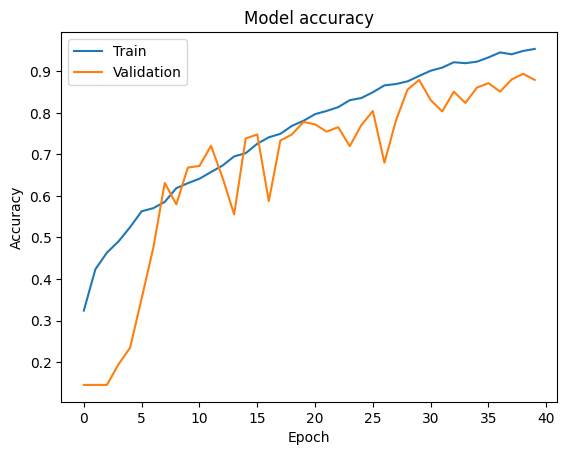

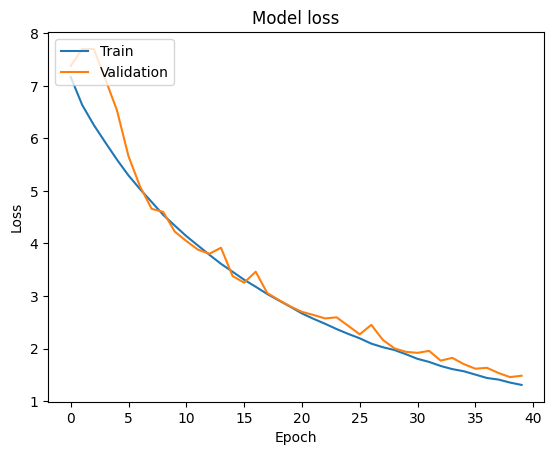

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
# Save the entire model to a file
model.save('/kaggle/working/teethModel.h5')



# **Pretrained Model**


In [52]:
# impor libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1/255,
  
)

# Rescaling only for validation and test sets
test_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Load the training data with augmentation
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load the validation and test data without augmentation
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

valid_generator = valid_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


# **VGG16**

In [55]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers


In [56]:
# Load VGG16 model without the top layers and with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing weights of all layers except top (last)
for layer in base_model.layers:
    layer.trainable = False

# Add new layers to the end of VGG16
num_classes = 7
x = base_model.output
x = Flatten()(x)  # Add a flattening layer
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)  # Add a dropout layer  
   
# Output layer
predictions = Dense(num_classes, activation='softmax')(x)




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [57]:
# Create the final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
learning_rate = 0.0001
model_vgg16.compile(optimizer=Adam(learning_rate=learning_rate), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])



In [58]:
history = model_vgg16.fit(train_generator, validation_data=valid_generator, epochs=50, class_weight=class_weights_dict, callbacks=[early_stopping], batch_size = 32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-30 07:48:21.382453: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-08-30 07:48:21.382533: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-08-30 07:48:21.382544: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-08-30 07:48:21.382553: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-08-30 07:48:21.382562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

38/97 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.1600 - loss: 1.9858

2024-08-30 07:48:41.136860: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.00564, expected 3.36194
2024-08-30 07:48:41.136919: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.21235, expected 4.56865
2024-08-30 07:48:41.136931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 5.39965, expected 4.75595
2024-08-30 07:48:41.136944: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.25668, expected 4.61298
2024-08-30 07:48:41.136962: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.55266, expected 2.90896
2024-08-30 07:48:41.136974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 4.84224, expected 4.19854
2024-08-30 07:48:41.136986: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 4.23174, expected 3.58804
2024-08-30 07:48:41.136997: E external/local_xla/x

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1833 - loss: 1.9437

2024-08-30 07:48:56.532807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.46848, expected 3.68847
2024-08-30 07:48:56.532869: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.72762, expected 5.94762
2024-08-30 07:48:56.532883: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.00592, expected 5.22591
2024-08-30 07:48:56.532897: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.42362, expected 5.64362
2024-08-30 07:48:56.532909: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.34585, expected 4.56585
2024-08-30 07:48:56.532920: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.68756, expected 4.90755
2024-08-30 07:48:56.532932: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.73264, expected 4.95264
2024-08-30 07:48:56.532945: E external/local_xla/xla/se

97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 236ms/step - accuracy: 0.1837 - loss: 1.9430 - val_accuracy: 0.3755 - val_loss: 1.7325
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3271 - loss: 1.7388 - val_accuracy: 0.5107 - val_loss: 1.5032
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.4258 - loss: 1.4651 - val_accuracy: 0.5807 - val_loss: 1.3437
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.4830 - loss: 1.3421 - val_accuracy: 0.6459 - val_loss: 1.1998
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5329 - loss: 1.2145 - val_accuracy: 0.6907 - val_loss: 1.1295
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5867 - loss: 1.0965 - val_accuracy: 0.7228 - val_loss: 1.0531
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6119 - loss: 1.0373 - val_accuracy: 0.7412 - val_loss: 0.9906
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6440 - loss: 0.9624 - val_accuracy: 0.7617 - val_loss: 

In [59]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model_vgg16.evaluate(valid_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8848 - loss: 0.3726
Validation Loss: 0.37034207582473755
Validation Accuracy: 0.8803501725196838


In [60]:
# Predict the classes for the test set
test_loss, test_accuracy = model_vgg16.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9264 - loss: 0.2540
Test Loss: 0.34166815876960754
Test Accuracy: 0.9085603356361389


In [61]:
model_vgg16.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,538,711 (74.53 MB)

 Trainable params: 1,608,007 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 3,216,016 (12.27 MB)

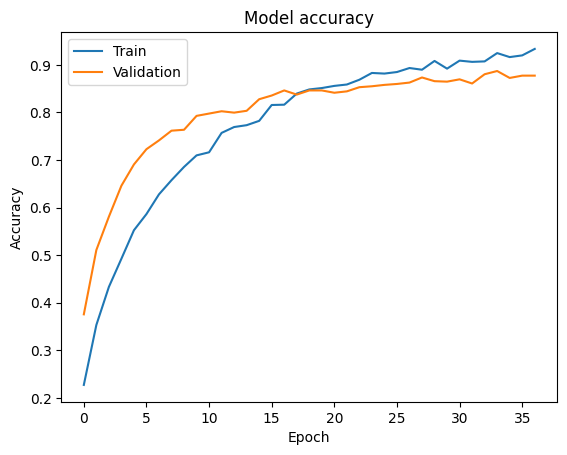

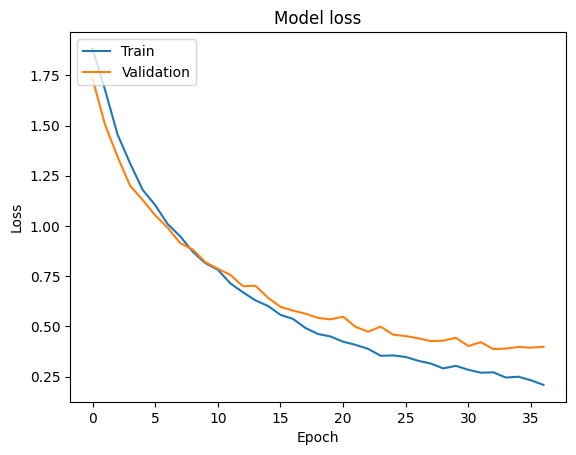

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


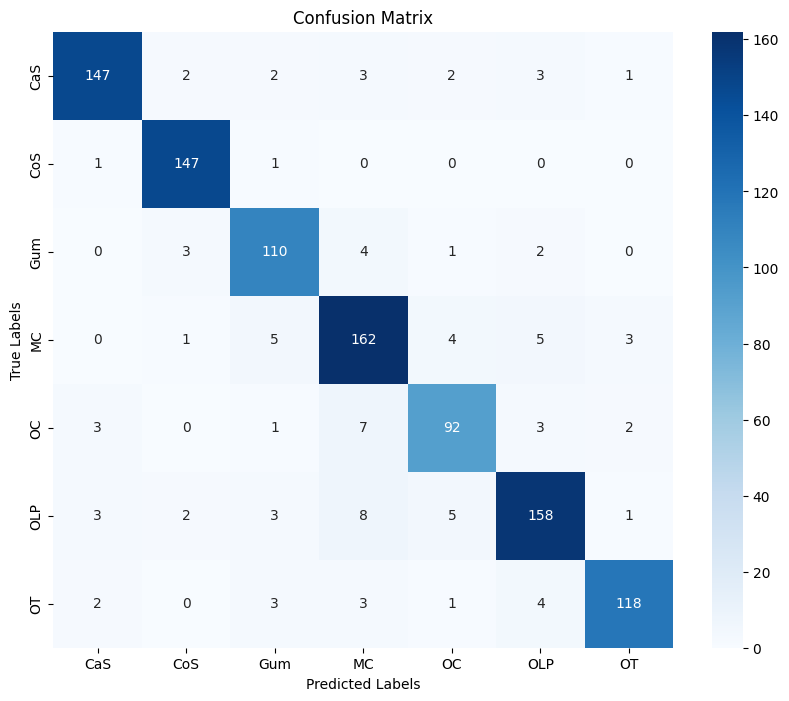

              precision    recall  f1-score   support

         CaS       0.94      0.92      0.93       160
         CoS       0.95      0.99      0.97       149
         Gum       0.88      0.92      0.90       120
          MC       0.87      0.90      0.88       180
          OC       0.88      0.85      0.86       108
         OLP       0.90      0.88      0.89       180
          OT       0.94      0.90      0.92       131

    accuracy                           0.91      1028
   macro avg       0.91      0.91      0.91      1028
weighted avg       0.91      0.91      0.91      1028



In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predictions for the test set
y_true = test_generator.classes  # True labels
y_pred = model_vgg16.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [81]:
model_vgg16.save("/kaggle/working/vgg16_teeth.h5")

# **Mobile-Net**

In [44]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.regularizers import l2


# Define the MobileNet model
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of MobileNet with L2 regularization
mobilenet_model = tf.keras.Sequential([
    mobilenet_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax', kernel_regularizer=l2(0.15))  # L2 regularization added here
])




In [45]:
# Compile the model
mobilenet_model.compile(optimizer= Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [46]:
# Train the model
history = mobilenet_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    batch_size=32
)



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - accuracy: 0.3343 - loss: 4.2293 - val_accuracy: 0.4095 - val_loss: 5.4964
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.7593 - loss: 2.5437 - val_accuracy: 0.7140 - val_loss: 2.5781
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9018 - loss: 2.0399 - val_accuracy: 0.9154 - val_loss: 1.9024
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9450 - loss: 1.7636 - val_accuracy: 0.9416 - val_loss: 1.6643
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9786 - loss: 1.5306 - val_accuracy: 0.9591 - val_loss: 1.4585
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9859 - loss: 1.3496 - val_accuracy: 0.9708 - val_loss: 1.2815
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9908 - loss: 1.1787 - val_accuracy: 0.9757 - val_loss: 1.1157
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9948 - loss: 1.0229 - val_accuracy: 0.9864 - val_loss: 

In [47]:
# Evaluate the model
loss, accuracy = mobilenet_model.evaluate(valid_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9831 - loss: 0.7342
Validation Loss: 0.7311831712722778
Validation Accuracy: 0.9834630489349365


In [48]:
# Predict the classes for the test set
test_loss, test_accuracy = mobilenet_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9873 - loss: 0.7088
Test Loss: 0.734002947807312
Test Accuracy: 0.9805447459220886


In [49]:
mobilenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,664,343 (36.87 MB)

 Trainable params: 3,214,151 (12.26 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 6,428,304 (24.52 MB)

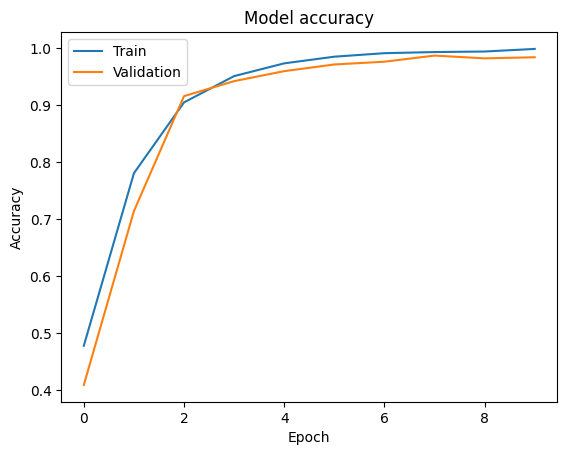

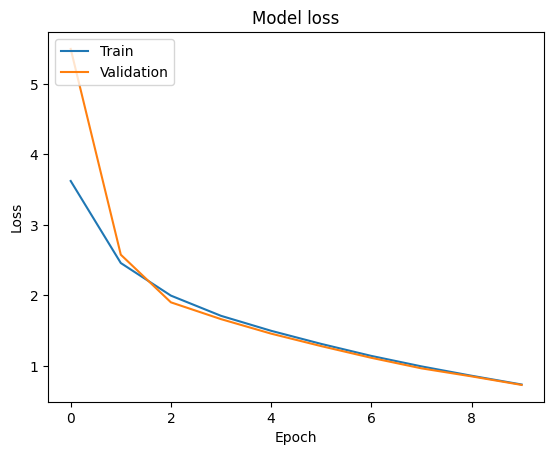

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step


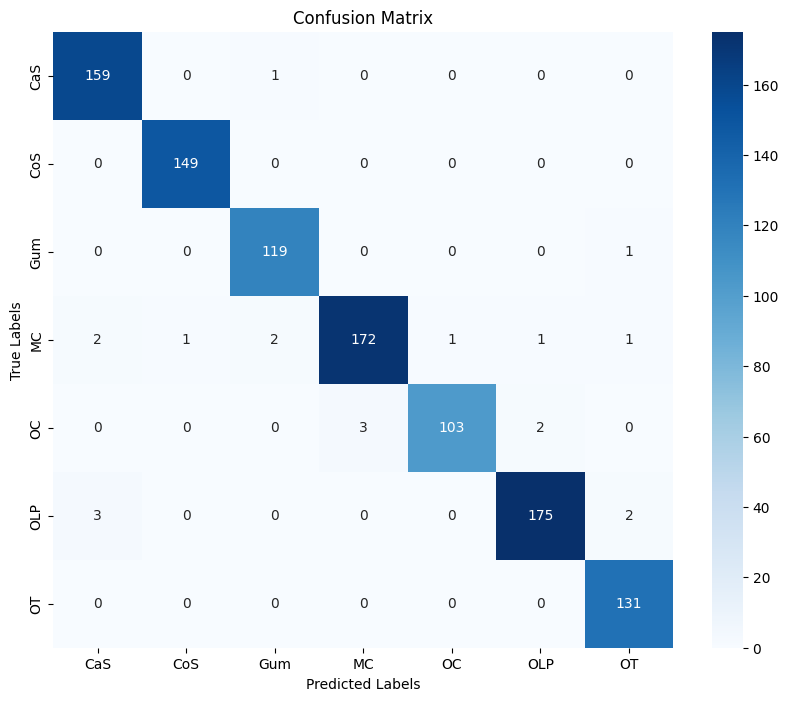

              precision    recall  f1-score   support

         CaS       0.97      0.99      0.98       160
         CoS       0.99      1.00      1.00       149
         Gum       0.98      0.99      0.98       120
          MC       0.98      0.96      0.97       180
          OC       0.99      0.95      0.97       108
         OLP       0.98      0.97      0.98       180
          OT       0.97      1.00      0.98       131

    accuracy                           0.98      1028
   macro avg       0.98      0.98      0.98      1028
weighted avg       0.98      0.98      0.98      1028



In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predictions for the test set
y_true = test_generator.classes  # True labels
y_pred = mobilenet_model.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [110]:
mobilenet_model.save("/kaggle/working/mobile_net.h5")